In [5]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
X = np.load("data/emnist_ab/images_train.npy")
y = np.load("data/emnist_ab/labels_train.npy")
X_test = np.load("data/emnist_ab/images_test.npy")
y_test = np.load("data/emnist_ab/labels_test.npy")

In [7]:
pd.Series(y).value_counts() # Seulement dix images de chaque classe !

1    10
0    10
dtype: int64

In [8]:
# Il faut séparer encore le train en deux (créer un validation set) pour pouvoir vérifier que l'on overfit pas trop
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, shuffle=True, stratify=y)

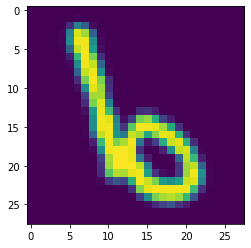

In [9]:
plt.imshow(X_train[0].squeeze())

Si l'on tente d'entraîner un modèle d'une taille importante sur les 10 images dont on dispose, il tombera dans le sur-apprentissage très rapidement.

Il faut donc utiliser plusieurs méthodes pour limiter cela :
- Utiliser un modèle avec peu de paramètres / très régularisé : Vous pouvez utiliser `model.summary()` pour vérifier le nombre de paramètres entraînables du modèle, il doit être petit afin de limiter l'overfitting.
- Utiliser le validation set pour arrêter l'entraînement quand la loss sur le validation set commence à remonter : cela s'appelle l'Early Stopping.

### Look at the Data

In [22]:
X[0].shape

(28, 28, 1)

In [40]:
X.dtype

dtype('uint8')

In [44]:
X[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [49]:
X.shape

(20, 28, 28, 1)

In [50]:
np.shape(X)

(20, 28, 28, 1)

In [55]:
X_lignes = np.shape(X)[1]
X_colonnes = np.shape(X)[2]

In [57]:
X_colonnes, X_lignes

(28, 28)

### *Data Augmentation*

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_data_generator = ImageDataGenerator(rescale=1./255)

In [16]:
train_datagen = ImageDataGenerator(
      rotation_range=15,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.4,
      zoom_range=0.3,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

### Définition du Modèle

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [71]:
model = Sequential()

In [72]:
model.add(Conv2D(10, kernel_size=3, 
                 activation='relu',
                 input_shape=(X_lignes, X_colonnes, 1)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [73]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
train_generator = train_data_generator.flow_from_directory(
        'data/',
        target_size=(28, 28),
        batch_size=1,
        class_mode='binary')

# assuming model already defined...

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      verbose=2)

Found 0 images belonging to 1 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
# Construire et compiler ici votre modèle.


In [ ]:
# Afficher ici le summary du modèle


In [ ]:
# Entraîner ici votre modèle


In [ ]:
# Evaluation du modèle
## Attention : dans cette mise en situation, l'entreprise n'a accès qu'à très peu d'images, c'est le coeur du problème.
## Le test set que nous utilisons dans ce notebook n'existe donc pas dans la mise en situation.
## Il représente le monde réel et tous les autres A et B que l'algorithme devra traiter après avoir été entraîné.
## Il faut donc l'utiliser le moins de fois possible dans cet exercice et il ne doit surtout pas être utilisé
## pour décider quel modèle utiliser.
## Pour cela, fiez-vous à votre validation set.


Chez moi, le modèle atteint déjà une accuracy de 60-65%. C'est déjà la preuve qu'il apprend mais on peut faire mieux.

Avec data augmentation :

In [ ]:
# Utilisez tf.keras.preprocessing.image.ImageDataGenerator pour créer un objet "generator" qui permettra
# de modifier légèrement les images à chaque epoch d'entraînement.


In [ ]:
# Construisez ici un modèle avec plus de paramètres que le précédent :
# Grâce à la data augmentation, il va beaucoup moins overfitter que le précédent.


In [ ]:
# Entraînez ici votre modèle en utilisant generator.flow(X_train, y_train)


In [ ]:
# Une fois satisfaits de votre performance sur le validation set, évaluez une seule fois sur le test set


On a déjà atteint une bien meilleure performance grâce à l'augmentation de données. En effet, celle-ci limite beaucoup l'overfitting et nous permet donc d'utiliser un modèle bien plus gros.

Chez moi, l'accuracy atteint 70-80%.

Mais l'on peut vraisemblablement faire encore mieux en combinant cette approche à du transfer learning. Pour ce faire, on va utilser le modèle entraîné précédemment sur le jeu de données MNIST (reconnaissance de chiffres), retirer sa dernière couche et la remplacer par une couche Dense(1) afin qu'elle soit adaptée au problème actuel.

Nous allons ensuite réentraîner le modèle ainsi modifié, en rendant ses couches inférieures non-entraînables.

In [ ]:
# Chargez ici le modèle entraîné précédemment sur MNIST

# Enlevez la dernière couche avec model.pop()

# Rendez le modèle non entraînable


Construisons un nouveau modèle à partir de cet ancien.

In [ ]:
# Construisez et compilez ici votre modèle de transfer learning en rajoutant au modèle mnist une couche Dense(1).


In [ ]:
# Entraînez ici votre modèle. A vous de voir si vous utilisez encore la data augmentation ou si vous gardez X_train et y_train sans les changer.


In [ ]:
# Une fois satisfaits de votre performance sur le validation set, évaluez une seule fois sur le test set


Chez moi, la performance est comparable au modèle avec data augmentation.

Cela peut s'expliquer par le fait que la tâche de reconnaissance des A et des B n'est pas très difficile et la data augmentation suffit à recouvrir une grande partie des cas possibles. Si on avait choisi une tâche plus difficile (par exemple reconnaître les 26 lettres de l'alphabet, je pense que le transfer learning aurait mieux fonctionné que la data augmentation seule.